# Laplacian Associative Memory (LAM) - PREF. MAP SCALING

[Multiscale representations of community structures in attractor neural networks](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8412329/pdf/pcbi.1009296.pdf) (2021)

In [1]:
import sys
sys.path.append('../..')

In [2]:
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import libtools

---

#### DATA

In [4]:
img = np.array(PIL.Image.open("../../data/images/coco/mesh.png").convert('L'), dtype=float)
img /= np.max(img)

print('Image:', img.shape)
print('min:', f"{img.min():.2f}", 'max:', f"{img.max():.2f}")

Image: (200, 200)
min: 0.00 max: 1.00


In [5]:
src0 = libtools.preference_map(16, 25, img.shape[0]) # Previous
src1 = libtools.preference_map(16, 35, img.shape[0])
src2 = libtools.preference_map(16, 45, img.shape[0])

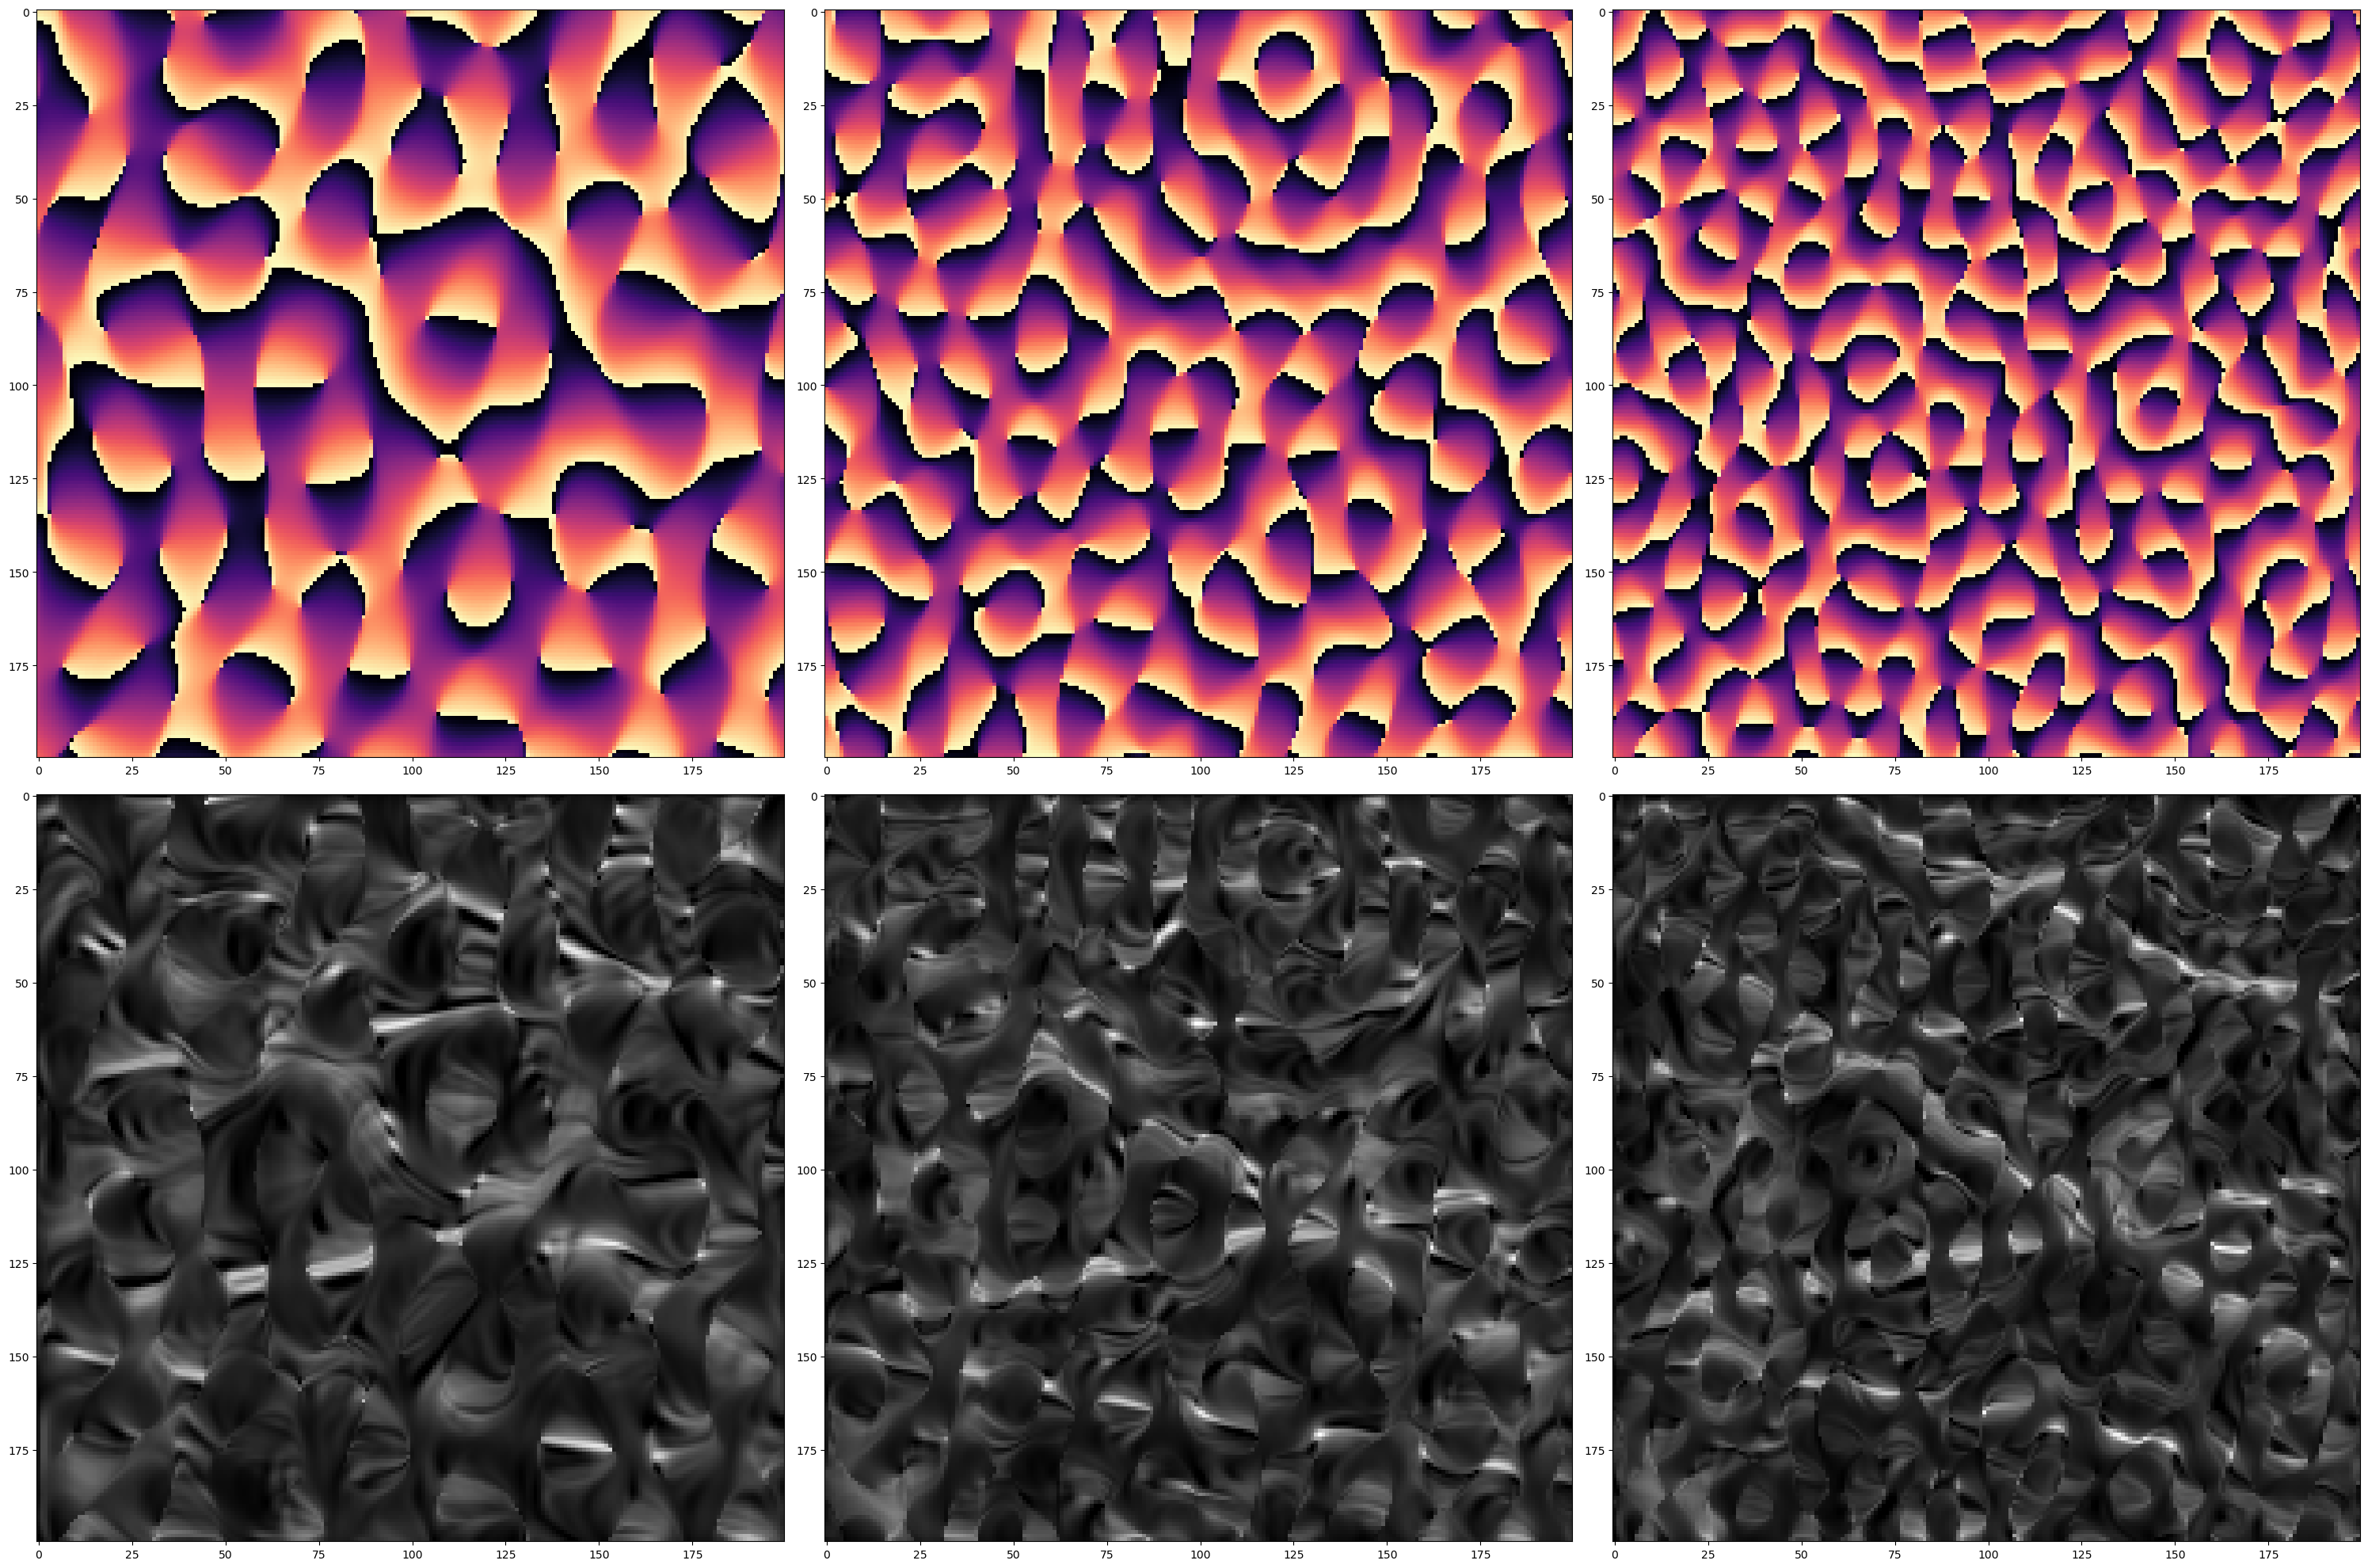

In [6]:
p_maps = [src0, src1, src2]
f_maps = []

plt.figure(figsize=(30,20))
for i in range(len(p_maps)):
    features = libtools.gabor_conv(img, p_maps[i])
    features /= np.max(features)

    f_maps.append(features)

    plt.subplot(2,3,i+1)    
    plt.imshow(p_maps[i], 'magma')

    plt.subplot(2,3,i+4)
    plt.imshow(features, 'gray')

plt.tight_layout()